In [ ]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.shape

(398, 9)

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
mpg.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [ ]:
mpg = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

In [ ]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [ ]:
mpg = mpg.dropna(axis=0)

In [ ]:
mpg.shape

(392, 7)

In [ ]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

In [ ]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [ ]:
X = mpg[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration']]
y = mpg['model_year']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

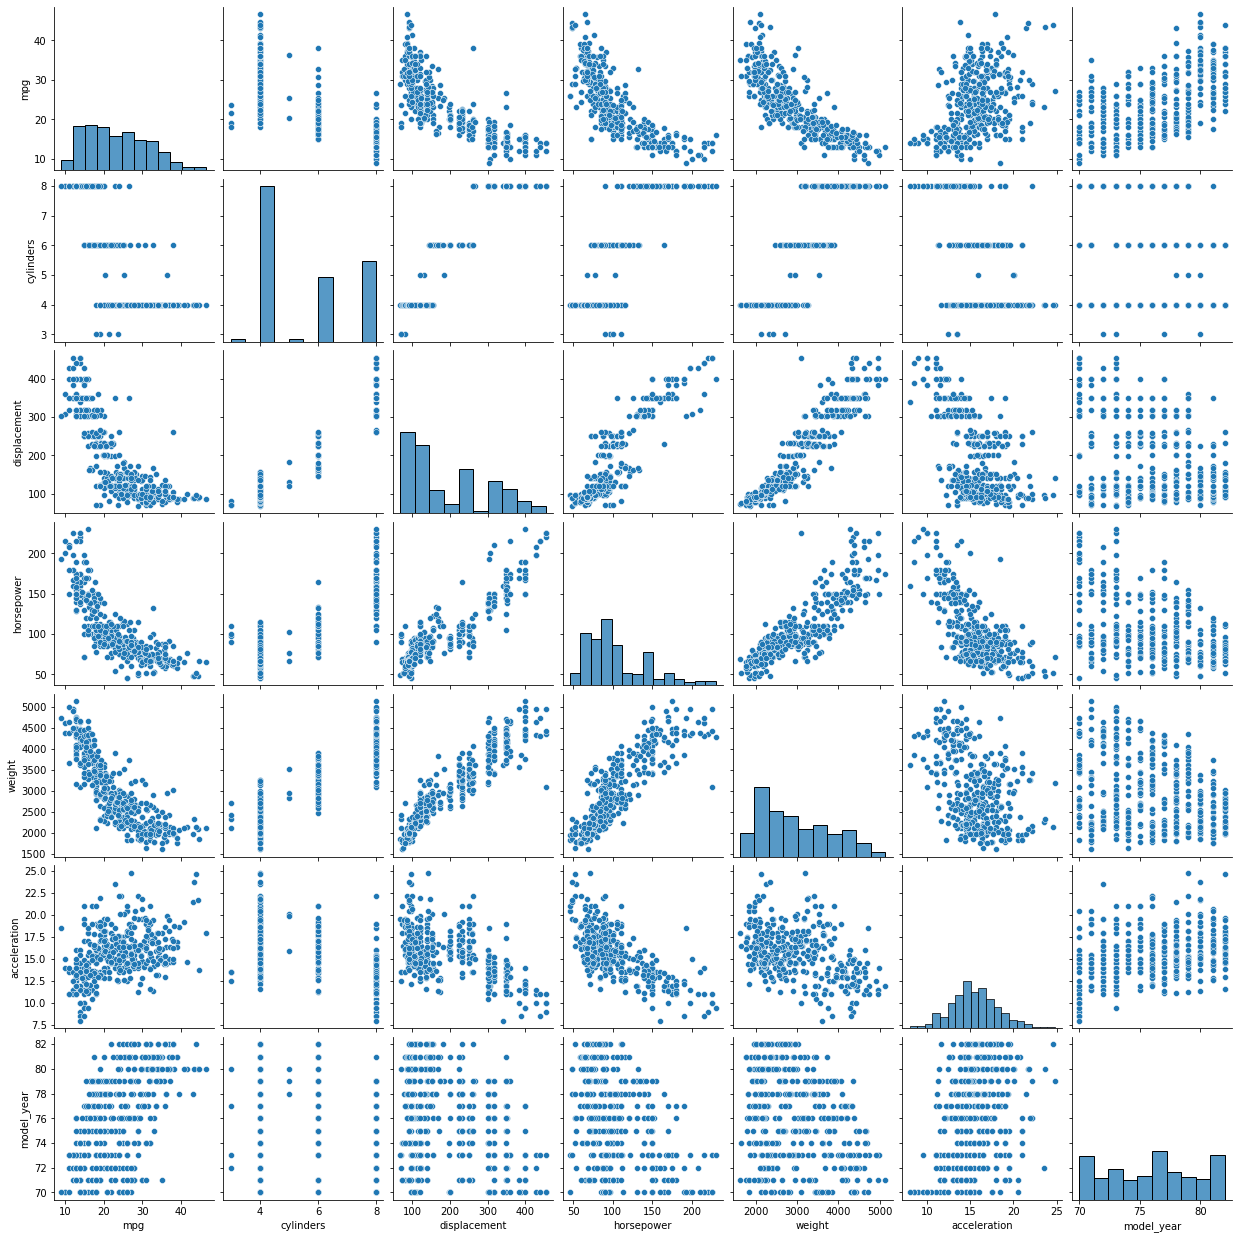

In [ ]:
sns.pairplot(mpg)
plt.show()

### Ordinary Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = mpg.horsepower
y =  mpg.weight
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=21)

In [ ]:
x_train.shape, x_test.shape, y_train.shape

((274,), (118,), (274,))

In [ ]:
x_train.shape, y_train.shape

((274,), (274,))

In [ ]:
lr = LinearRegression()
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

array([997.0413365])

In [ ]:
lr.coef_

array([[19.02694027]])

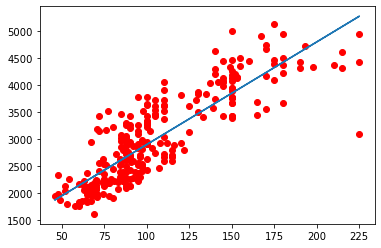

In [ ]:
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, x_train*lr.coef_ + lr.intercept_)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_train,y_train)

8970182.15328467

In [ ]:
new_df = pd.DataFrame({'x' : x, 'y' : y})
new_df.describe()

,x,y
count,392.000000,392.000000
mean,104.469388,2977.584184
std,38.491160,849.402560
min,46.000000,1613.000000
25%,75.000000,2225.250000
50%,93.500000,2803.500000
75%,126.000000,3614.750000
max,230.000000,5140.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = scaler.fit_transform(new_df)

In [ ]:
new_df = pd.DataFrame(new_df, columns=['x','y'])

In [ ]:
new_df.describe()

,x,y
count,392.000000,392.000000
mean,0.317768,0.386897
std,0.209191,0.240829
min,0.000000,0.000000
25%,0.157609,0.173589
50%,0.258152,0.337539
75%,0.434783,0.567550
max,1.000000,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df.x, new_df.y, test_size=0.3, random_state=23)


In [ ]:
lr = LinearRegression()
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
mean_squared_error(x_train,y_train), mean_squared_error(x_test,y_test)

(0.019870067427852366, 0.01827933490264672)

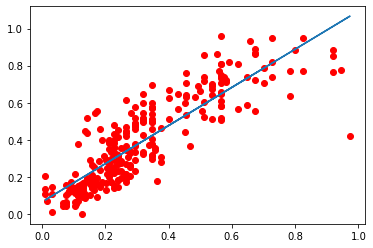

In [ ]:
plt.plot(x_train, y_train, 'ro')
plt.plot(x_train, x_train*lr.coef_ + lr.intercept_)
plt.show()

In [ ]:
lr.intercept_, lr.coef_

(array([0.06467777]), array([[1.02953121]]))

In [ ]:
A = np.array([2,3,1,3,4,1])
A

array([2, 3, 1, 3, 4, 1])

In [ ]:
A.reshape(2,-1)

array([[2, 3, 1],
       [3, 4, 1]])

In [ ]:
A.reshape(-1,1)

array([[2],
       [3],
       [1],
       [3],
       [4],
       [1]])

In [ ]:
A.reshape(3,2)

array([[2, 3],
       [1, 3],
       [4, 1]])

In [ ]:
A.reshape(3,-1)

array([[2, 3],
       [1, 3],
       [4, 1]])